<a href="https://colab.research.google.com/github/dheerajpreetsingh/APMLP/blob/main/APMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt

In [1]:
from google.colab import drive

drive.mount('/content/drive')

desired_folder_path = '/content/drive/My Drive/APMLP'

!ln -s "$desired_folder_path" "/content/APMLP"


Mounted at /content/drive


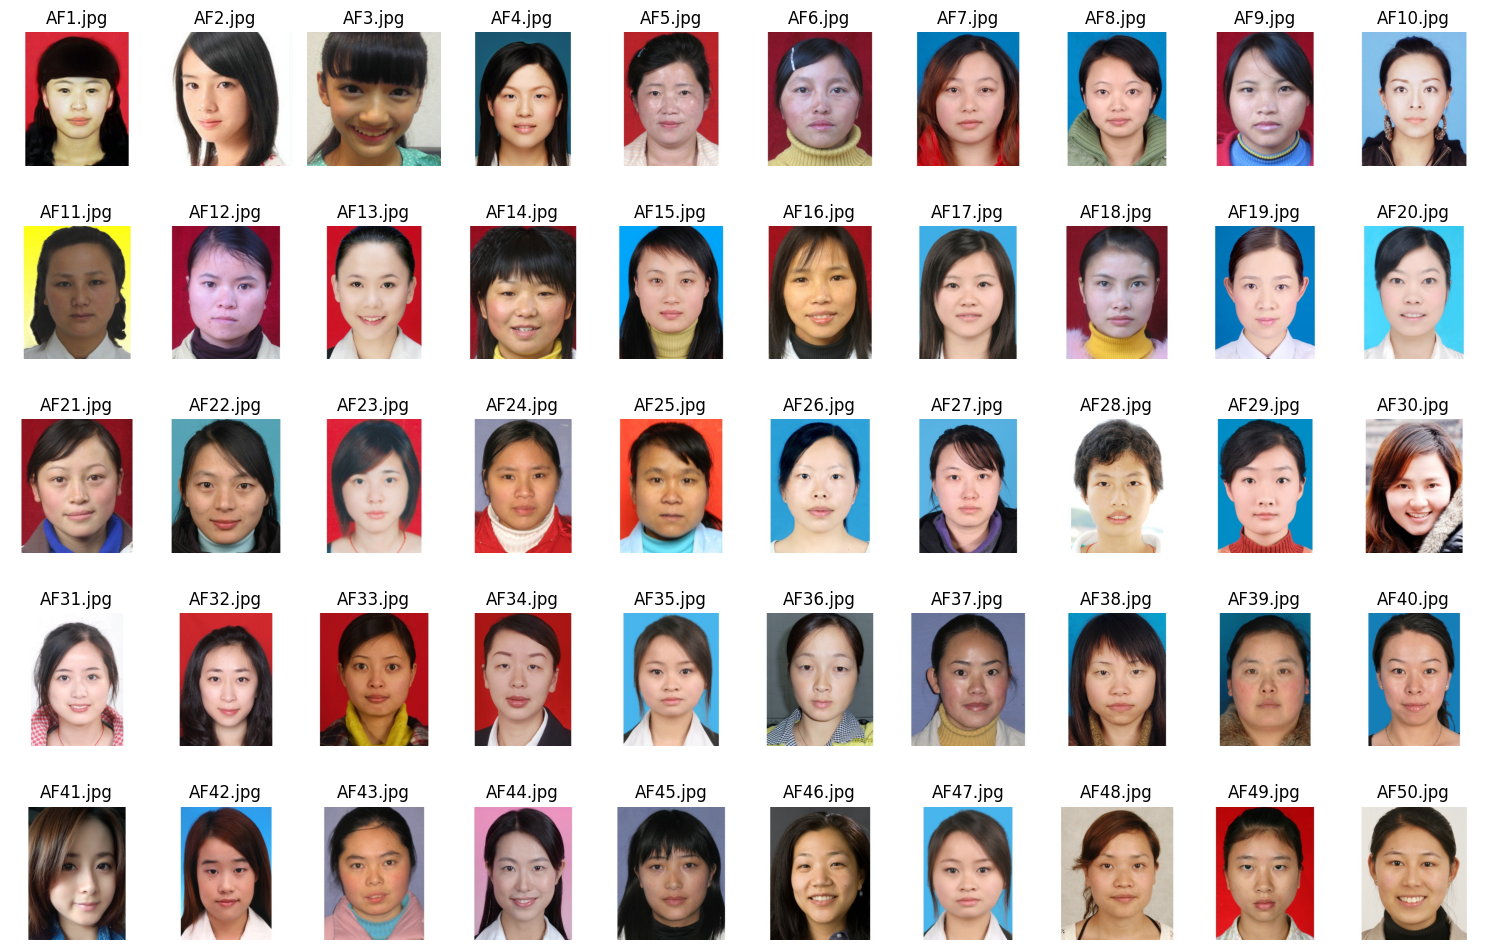

In [18]:
fig , axs=plt.subplots(nrows=5,ncols=10,figsize=(15,10))
axs=axs.flatten()
for i in range(50):
  filepath="/content/APMLP/Data_Images/"+"AF"+str(i+1)+".jpg"
  img=Image.open(filepath)
  axs[i].imshow(img)
  axs[i].axis("Off")
  axs[i].set_title("AF"+str(i+1)+".jpg")
plt.tight_layout()
plt.show()

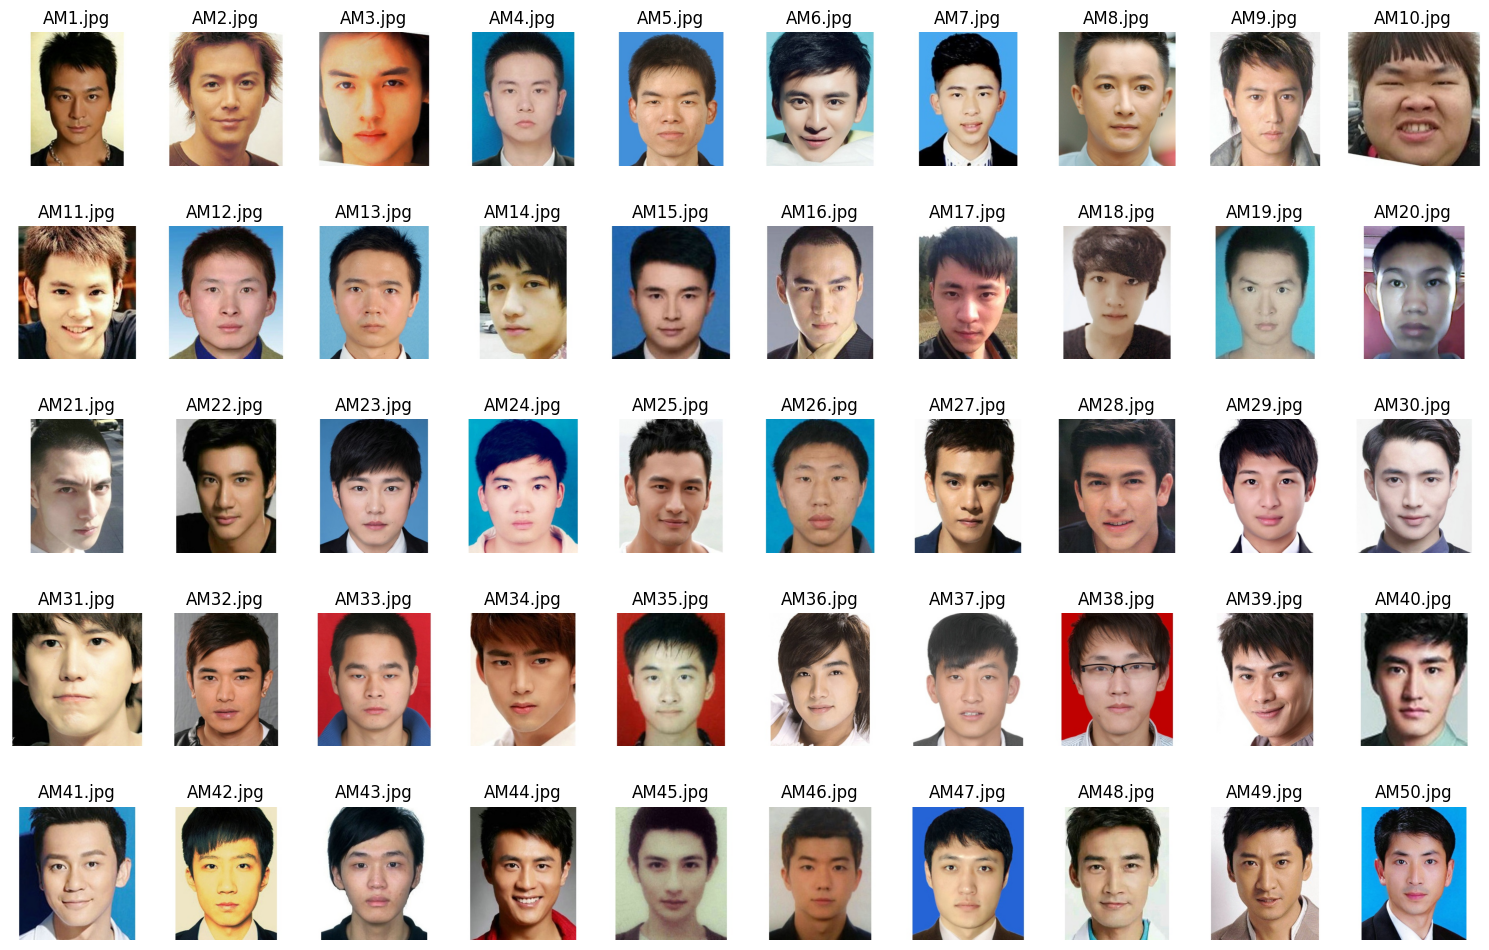

In [19]:
fig , axs=plt.subplots(nrows=5,ncols=10,figsize=(15,10))
axs=axs.flatten()
for i in range(50):
  filepath="/content/APMLP/Data_Images/"+"AM"+str(i+1)+".jpg"
  img=Image.open(filepath)
  axs[i].imshow(img)
  axs[i].axis("Off")
  axs[i].set_title("AM"+str(i+1)+".jpg")
plt.tight_layout()
plt.show()

In [ ]:
dff=pd.read_csv("/content/APMLP/Rating_Female.csv", low_memory=False)
dff1=dff.drop("original Rating",axis=1)
dff1.head()

,Rater,Filename,Rating
0,1.0,AF1.jpg,2.0
1,2.0,AF1.jpg,3.0
2,3.0,AF1.jpg,2.0
3,4.0,AF1.jpg,1.0
4,5.0,AF1.jpg,3.0


In [ ]:
dfm=pd.read_csv("/content/APMLP/Rating_Male.csv", low_memory=False)
dfm1=dfm.drop("original Rating",axis=1)
dfm1.head()

,Rater,Filename,Rating
0,1.0,AM1.jpg,4.0
1,2.0,AM1.jpg,4.0
2,3.0,AM1.jpg,5.0
3,4.0,AM1.jpg,3.0
4,5.0,AM1.jpg,4.0


1
M


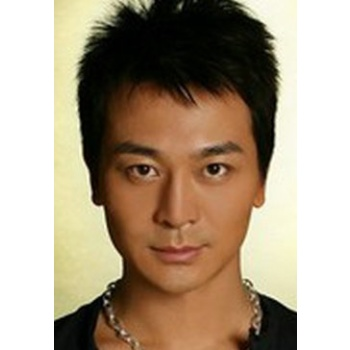

In [ ]:
Mn=input()
s=input()
res="A"+s+n+".jpg"

image_path = "/content/APMLP/Data_Images/"+res
img = Image.open(image_path)

display(img)

In [ ]:
dff2=dff1.dropna(how='all')
dff2

,Rater,Filename,Rating
0,1.0,AF1.jpg,2.0
1,2.0,AF1.jpg,3.0
2,3.0,AF1.jpg,2.0
3,4.0,AF1.jpg,1.0
4,5.0,AF1.jpg,3.0
...,...,...,...
119995,56.0,AF2000.jpg,3.0
119996,57.0,AF2000.jpg,4.0
119997,58.0,AF2000.jpg,3.0
119998,59.0,AF2000.jpg,4.0


In [ ]:
dfm2=dfm1.dropna(how='all')
dfm2

,Rater,Filename,Rating
0,1.0,AM1.jpg,4.0
1,2.0,AM1.jpg,4.0
2,3.0,AM1.jpg,5.0
3,4.0,AM1.jpg,3.0
4,5.0,AM1.jpg,4.0
...,...,...,...
119995,56.0,AM999.jpg,2.0
119996,57.0,AM999.jpg,1.0
119997,58.0,AM999.jpg,2.0
119998,59.0,AM999.jpg,3.0


In [ ]:
ndfm = dfm2.groupby('Filename')['Rating'].mean().reset_index()
ndfm

,Filename,Rating
0,AM1.jpg,3.950000
1,AM10.jpg,1.166667
2,AM100.jpg,2.016667
3,AM1000.jpg,2.766667
4,AM1001.jpg,2.300000
...,...,...
1995,AM995.jpg,2.700000
1996,AM996.jpg,2.050000
1997,AM997.jpg,2.550000
1998,AM998.jpg,2.583333


In [ ]:
ndff = dff2.groupby('Filename')['Rating'].mean().reset_index()
ndff

,Filename,Rating
0,AF1.jpg,2.333333
1,AF10.jpg,3.433333
2,AF100.jpg,2.900000
3,AF1000.jpg,3.966667
4,AF1001.jpg,3.733333
...,...,...
1995,AF995.jpg,3.016667
1996,AF996.jpg,3.366667
1997,AF997.jpg,3.733333
1998,AF998.jpg,3.350000


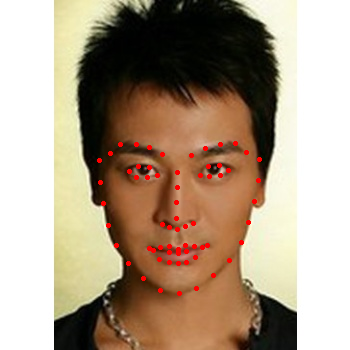

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow


image=cv2.imread("/content/APMLP/Data_Images/AM1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


face_detector=dlib.get_frontal_face_detector()
landmark_predictor=dlib.shape_predictor("/content/APMLP/shape_predictor_68_face_landmarks.dat")

faces=face_detector(gray)

for face in faces:
    landmarks = landmark_predictor(gray, face)

    if landmarks.num_parts == 68:
        for point in range(68):
            x, y = landmarks.part(point).x, landmarks.part(point).y
            cv2.circle(image, (x, y), 1, (0, 0, 255), thickness=2)
    else:
        print("Error: Incorrect number of facial landmarks detected.")

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()